In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [27]:
df = pd.read_csv("flchain.csv")

cols= ['age', 'sex', 'sample.yr', 'kappa', 'lambda', 'flc.grp', 'creatinine', 'mgus', 'futime', 'death']
df = df[cols]
#fill NaN value with Mediam value
df['creatinine'] = df['creatinine'].fillna(df['creatinine'].median())
#Let F = 1, M = 0
d = {'F':0, 'M':1}
df['sex'] = df['sex'].apply(lambda x:d[x])

In [28]:
data_train=(df.loc[df['death']==1]).copy()
data_train.drop(['death'],1,inplace=True)
feature=[c for c in data_train.columns if c not in ['age']]
target=['age']

data_train.head()

,age,sex,sample.yr,kappa,lambda,flc.grp,creatinine,mgus,futime
0,97,0,1997,5.70,4.860,10,1.7,0,85
1,92,0,2000,0.87,0.683,1,0.9,0,1281
2,94,0,1997,4.36,3.850,10,1.4,0,69
3,92,0,1996,2.42,2.220,9,1.0,0,115
4,93,0,1996,1.32,1.690,6,1.1,0,1039


In [29]:
train=data_train[:]
val=data_train[:]

In [30]:
from keras.layers import Activation, Dense, Dropout
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential

In [31]:
NN_model = Sequential()
NN_model.add(Dense(32, kernel_initializer='normal'))
NN_model.add(Dense(1, kernel_initializer='normal'))    
NN_model.add(Activation('linear'))
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

history=NN_model.fit(train[feature].values, train[target].values, epochs=19, batch_size=10)


preds = NN_model.predict(val[feature].values) 
score = mean_absolute_error(val[target].values, preds)
print(score)

Epoch 1/19
2169/2169 [==============================] - 0s 204us/step - loss: 11.9773 - mean_absolute_error: 11.9773
Epoch 2/19
2169/2169 [==============================] - 0s 112us/step - loss: 8.8105 - mean_absolute_error: 8.8105A: 0s - loss: 9.3233 - mean_absolute_error: 9.32
Epoch 3/19
2169/2169 [==============================] - 0s 101us/step - loss: 8.5876 - mean_absolute_error: 8.5876
Epoch 4/19
2169/2169 [==============================] - 0s 100us/step - loss: 8.4648 - mean_absolute_error: 8.4648
Epoch 5/19
2169/2169 [==============================] - 0s 100us/step - loss: 8.6211 - mean_absolute_error: 8.6211
Epoch 6/19
2169/2169 [==============================] - 0s 100us/step - loss: 8.7414 - mean_absolute_error: 8.7414
Epoch 7/19
2169/2169 [==============================] - 0s 102us/step - loss: 8.4254 - mean_absolute_error: 8.4254
Epoch 8/19
2169/2169 [==============================] - 0s 99us/step - loss: 8.5350 - mean_absolute_error: 8.5350
Epoch 9/19
2169/2169 [=========

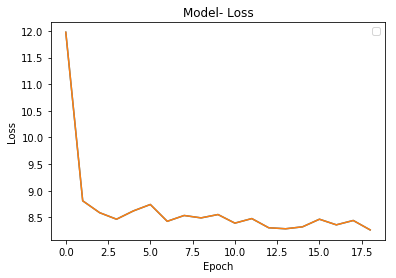

In [32]:
fig2, ax_loss = plt.subplots()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model- Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.plot(history.history['loss'])
plt.plot(history.history['mean_absolute_error'])
plt.show()

In [36]:
# me=np.array([24, 1, 1997, 5.79, 4.5466, 9, 1.5, 0, 44])
# data_test=(df.loc[df['death']==0]).copy()
# data_test.drop(['death'],1,inplace=True)
# data_test.loc[-1] = me
# estimation = NN_model.predict(data_test[feature].values)

In [37]:
# estimation[-1]
# print("age: {}".format(estimation[-1]))